# LINKS

- ## [join/merge DF python pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)


---

In [1]:
import os, sys, time
from time import sleep
from pathlib import Path
from datetime import datetime, timedelta

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pyodbc

In [3]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

In [4]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
# [2020-02-19]]\\import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import tempfile

## *FUNCTIONS*

In [6]:
def send_mail(send_from, send_to, subject, message, files=[],
              server="cos.smtp.agilent.com", port=587, use_tls=True):  # {
    print("SENDING MAIL... DATE == " + str(pd.Timestamp.now())[:10])
    msg = MIMEMultipart()
    msg['From'] = send_from
    msg['To'] = COMMASPACE.join(send_to)
    msg['Date'] = formatdate(localtime=True)
    msg['Subject'] = subject

    msg.attach(MIMEText(message))

    for path in files:  # {
        part = MIMEBase('application', "octet-stream")
        with open(path, 'rb') as file:  # {
            part.set_payload(file.read())
        # }
        encoders.encode_base64(part)
        part.add_header('Content-Disposition',
                        'attachment; filename="{}"'.format(op.basename(path)))
        msg.attach(part)
    # }

    smtp = smtplib.SMTP(server, port)
    if use_tls:  # {
        smtp.starttls()
    # }
    smtp.sendmail(send_from, send_to, msg.as_string())
    smtp.quit()
# }

In [7]:
def pull_prodflow_data(table_name): # {
    pass
# }

In [8]:
def push_prodflow_data(table_name): # {
    pass
# }

## Ask for `Email Address`:

## Ask for `Date`:

In [9]:
date_input = input("Input a Date:")

Input a Date:2020-02-27


In [10]:
# the_date = pd.Timestamp.now()
test_date = pd.Timestamp(ts_input=str(date_input))
print(test_date)

2020-02-27 00:00:00


In [11]:
td_one_month_ago = test_date - pd.Timedelta(unit='M', value=1)
print(td_one_month_ago)

2020-01-27 13:30:54


C:\Users\derbates\miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
one_month_ago = test_date - timedelta(days = 30)

In [13]:
print("ONE MONTH AGO == " + str(one_month_ago))

ONE MONTH AGO == 2020-01-28 00:00:00


In [14]:
# DAILY METRICS
# df_week_range = pd.date_range(start=one_month_ago, end=test_date, freq="M-SAT")
df_month_range = pd.date_range(start=one_month_ago, end=test_date, freq='D') #, periods=30)

In [15]:
type(df_month_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
list(df_month_range)

[Timestamp('2020-01-28 00:00:00', freq='D'),
 Timestamp('2020-01-29 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-01-31 00:00:00', freq='D'),
 Timestamp('2020-02-01 00:00:00', freq='D'),
 Timestamp('2020-02-02 00:00:00', freq='D'),
 Timestamp('2020-02-03 00:00:00', freq='D'),
 Timestamp('2020-02-04 00:00:00', freq='D'),
 Timestamp('2020-02-05 00:00:00', freq='D'),
 Timestamp('2020-02-06 00:00:00', freq='D'),
 Timestamp('2020-02-07 00:00:00', freq='D'),
 Timestamp('2020-02-08 00:00:00', freq='D'),
 Timestamp('2020-02-09 00:00:00', freq='D'),
 Timestamp('2020-02-10 00:00:00', freq='D'),
 Timestamp('2020-02-11 00:00:00', freq='D'),
 Timestamp('2020-02-12 00:00:00', freq='D'),
 Timestamp('2020-02-13 00:00:00', freq='D'),
 Timestamp('2020-02-14 00:00:00', freq='D'),
 Timestamp('2020-02-15 00:00:00', freq='D'),
 Timestamp('2020-02-16 00:00:00', freq='D'),
 Timestamp('2020-02-17 00:00:00', freq='D'),
 Timestamp('2020-02-18 00:00:00', freq='D'),
 Timestamp

In [17]:
df_month_range = pd.DataFrame(pd.Series(df_month_range), columns=['QCDate'])

In [18]:
print(df_month_range)

       QCDate
0  2020-01-28
1  2020-01-29
2  2020-01-30
3  2020-01-31
4  2020-02-01
5  2020-02-02
6  2020-02-03
7  2020-02-04
8  2020-02-05
9  2020-02-06
10 2020-02-07
11 2020-02-08
12 2020-02-09
13 2020-02-10
14 2020-02-11
15 2020-02-12
16 2020-02-13
17 2020-02-14
18 2020-02-15
19 2020-02-16
20 2020-02-17
21 2020-02-18
22 2020-02-19
23 2020-02-20
24 2020-02-21
25 2020-02-22
26 2020-02-23
27 2020-02-24
28 2020-02-25
29 2020-02-26
30 2020-02-27


In [19]:
type(df_month_range)

pandas.core.frame.DataFrame

In [20]:
df_month_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
QCDate    31 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.0 bytes


In [21]:
# MONTHLY METRICS
year_range = pd.date_range(end=test_date, freq='M', periods=12, name='QCDate')

In [22]:
print(year_range)

DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', freq='M')


---
### create *connection string* for [`SQL-Server`][`ProdflowII_Prod`] (for `Products` Table)
#### called `cnxn_Prodflow`

In [23]:
conn_str = str(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=wtkngappflow1.is.agilent.net;'
    r'DATABASE=ProdFlowII_Prod;'
    r'Trusted_Connection=yes;'
)

try: #{
    cnxn_Prodflow = pyodbc.connect(conn_str)
    crsr_Prodflow = cnxn_Prodflow.cursor()
#}
except: #{
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
#}
else: #{
    print("FIN...")
#}

FIN...


### create *connection string* for [`SQL-Server`][`Prodflow`] (for `tblProdflow` table)
#### called `cnxn_Prodflow2`

In [24]:
conn_str = str(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=wtkngappflow1.is.agilent.net;'
    r'DATABASE=ProdFlow;'
    r'Trusted_Connection=yes;'
)

try: # {
    cnxn_Prodflow2 = pyodbc.connect(conn_str)
    crsr_Prodflow2 = cnxn_Prodflow2.cursor()
# }
except: # { 
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("FIN...")
# }

FIN...


## `PRODUCTS` Table

In [25]:
# TRY THE FOLLOWING
try: # {
    df_products = pd.read_sql_query(sql='SELECT * FROM Products', con=cnxn_Prodflow)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_products.info())
    # [2020-02-25]\\print(products_info)
    # [2020-02-25]\\products_info.to_csv("products_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108334 entries, 0 to 108333
Data columns (total 42 columns):
ProductID          108334 non-null int64
Product#           108334 non-null object
ProductName        108306 non-null object
LineID             108334 non-null int64
Description        5973 non-null object
Specials           2443 non-null object
OriginationDate    107940 non-null datetime64[ns]
EntryDate          108332 non-null datetime64[ns]
Status             6036 non-null object
MatrixNumber       107450 non-null object
Components         108334 non-null int64
Availability       4843 non-null object
EquivalentSoln     102890 non-null object
EquivalentNeat     103048 non-null object
Packaging          107533 non-null object
Storage            100705 non-null object
ExpirationDate     108309 non-null float64
ShipType           95131 non-null object
UN#                93448 non-null object
ShipClass          87356 non-null object
PackGrp   

## `tblProdflow` Table

In [26]:
# TRY THE FOLLOWING
try: # {
    df_tblProdflow = pd.read_sql_query(sql='SELECT * FROM tblProdflow', 
                                       parse_dates = ['QCDate'],
                                       con=cnxn_Prodflow2)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_tblProdflow.info())
    # [2020-02-25]\\print(tblProdflow_info)
    # [2020-02-25]\\tblProdflow_info.to_csv("tblProdflow_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108642 entries, 0 to 108641
Data columns (total 53 columns):
PfIDNo              108642 non-null int64
PfBatchID           108642 non-null object
ProductNo           108623 non-null object
OrdID               92510 non-null float64
QuoteNo             108606 non-null object
PfSentTo            108577 non-null object
PrepDate            107628 non-null datetime64[ns]
PrepVolume          108597 non-null float64
PrepUnit            108566 non-null object
PrepVessel          108563 non-null float64
PrepVBarcode        57956 non-null object
PrdSaleUnit         89415 non-null object
PrepMatrixNo        108567 non-null object
PrepMatrixLot       107699 non-null object
PrepInits           107458 non-null object
PrepMemo            61244 non-null object
PrepNotebookRef     48969 non-null object
BulkQCStatus        24 non-null object
BulkQCDate          74986 non-null datetime64[ns]
BulkPassFail        74092 no

### Rename Header Column in `Products` Table

In [27]:
df_products.rename(columns={'Product#': 'ProductNo'}, inplace=True)

In [28]:
df_products.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,MatrixNotes,RecipeId,RushPriority,IsVoided,SagePartNumber,ProductLevel,DateInserted,CofATemplate,UniqueRequestID,Test_Timestamp
27214,16452,CUS-7089,Custom Standard,7,None,None,2005-11-04,2005-11-04,None,JHP-040,...,None,RP-14918,False,VOID,CUS-7089,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 /\xf6'
63882,24069,QTE-24069,Custom Standard,7,None,None,2007-03-15,2011-05-09,None,JHP-003,...,None,RP-33314,False,VOID,None,NaN,NaT,None,None,b'\x00\x00\x00\x00\x00 \xbe\xfd'
37180,85751,ICUS-4835,Custom Standard,8,None,None,2016-01-28,2016-01-28,None,JHP-377,...,None,RP-21757,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 V\xac'
89256,63417,QTE-63417,Custom Standard,8,None,None,2013-03-06,2013-03-06,None,JHP-046,...,Solution contians 5% nitric acid. Light Sensitive,RP-48522,False,VOID,None,1.0,NaT,GENERIC,None,"b'\x00\x00\x00\x00\x00!""\x7f'"
68763,31922,QTE-31922,Custom Standard,7,None,None,2008-05-30,2011-05-09,None,JHP-031,...,None,RP-33931,False,VOID,None,1.0,NaT,GENERIC,None,"b'\x00\x00\x00\x00\x00 \xd2""'"


---
## **CREATE** `df_QCMetrics` Table (calculations table)

In [29]:
#inner join in python pandas
df_QCMetrics = pd.merge(df_products, df_tblProdflow, on='ProductNo', how='right')
len(df_QCMetrics)

108642

In [30]:
# COPY FOR TESTING
TEST_METRICS = pd.DataFrame(data=df_QCMetrics)
TEST_METRICS.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
44029,16076.0,CUS-7420,Custom Standard,7.0,None,None,2005-10-11,2011-05-09,None,JHP-076,...,1.0,12.0,Approx. 100 mL in bulk,1.0,None,False,True,None,None,None
90043,7559.0,SP-140-1,Parathion Standard,1.0,1 analyte @ 100 µg/mL in methanol (methyl alco...,None,1999-01-20,2011-05-09,active,JHP-021,...,2.0,156.0,None,2.0,None,False,False,None,None,None
84931,82475.0,QCC-00234,Cysteic acid @ 0.453 g/L in 0.1N HCL,5.0,None,None,2015-08-03,2015-08-03,None,JHP-443,...,2.0,NaN,None,2.0,None,False,False,None,None,None
40324,11753.0,CUS-5962,Custom Standard,7.0,None,None,2004-10-21,2004-10-21,None,JHP-079,...,1.0,0.0,None,1.0,None,False,True,None,None,None
98307,7587.0,STM-410-1,Internal Standard,1.0,2 analytes @ 2000 µg/mL in methanol (methyl al...,None,1999-01-20,2011-05-09,active,JHP-021,...,2.0,284.0,Zero out lot U-0536 (284); Current,2.0,None,False,True,None,None,None


### Drop **ALL** rows without a `QCDate` & `ProductLevel` 

In [31]:
df_QCMetrics.dropna(axis=0, subset=['QCDate', 'ProductLevel'], how='any', inplace=True)
# [2020-02-24]\\df_QCMetrics.dropna(axis=0, subset=['QCDate', 'ProductLevel'], how='any', inplace=True)
len(df_QCMetrics)

84675

In [32]:
type(df_month_range)

pandas.core.frame.DataFrame

#### TEST_METRICS (dataframe)

In [33]:
# CONVERT from string to datetime
TEST_METRICS['QCDate'] = pd.to_datetime(TEST_METRICS['QCDate'])

In [34]:
# CONVERT FROM string to categorical
TEST_METRICS['ProductLevel'] = pd.Categorical(TEST_METRICS["ProductLevel"], ordered=False)

In [35]:
# SET ['QCDate'] & ['QCValidation'] as the INDEX and delete COLUMNS
# [2020-02-24]\\TEST_METRICS.set_index([TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']])
TEST_METRICS.index = [TEST_METRICS['QCDate'], TEST_METRICS['ProductLevel']]
del TEST_METRICS['QCDate'], TEST_METRICS['ProductLevel']
TEST_METRICS.sample(5)

,,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,ProductLevel,,,,,,,,,,,,,,,,,,,,,
2018-05-01,2.0,13995.0,BULK-PANAL0013,KCl Saturated with AgCl,8.0,None,None,2005-04-13,2005-04-13,None,JHP-040,...,2.0,6000.0,None,2.0,None,False,False,None,None,None
2018-11-29,1.0,30596.0,ICUS-2381-125,Custom Standard,8.0,None,None,2008-03-25,2008-03-25,None,JHP-040,...,1.0,1.0,None,1.0,None,False,False,None,None,None
2005-11-17,1.0,16400.0,CUS-7095,Custom Standard,7.0,None,None,2005-10-28,2011-05-09,None,JHP-001,...,1.0,1.0,45 ml in bulk,1.0,None,False,True,None,None,None
2005-02-14,NaN,6999.0,PST-865S,Propachlor Solution,1.0,1 analyte @ 100 µg/mL in methanol (methyl alco...,None,1999-01-20,2011-05-09,active,JHP-021,...,2.0,160.0,Back up lot; Current lot W-0056,2.0,None,False,True,None,None,None
NaT,2.0,84256.0,PST-6100A1000,Triticonazole Standard,7.0,None,None,2015-10-29,2015-10-29,None,JHP-003,...,1.0,NaN,None,1.0,None,False,False,None,None,None


In [36]:
# TEST_METRICS.groupby(TEST_METRICS.index)['PfBatchID'].count()
TEST_METRICS.groupby([TEST_METRICS.index, 'PfBatchID'])['PfBatchID'].count()

                            PfBatchID
(1996-10-11 00:00:00, nan)  NB961089     1
                            NB961088     1
                            NB961085     1
                            NB961090     1
                            NB961091     1
                                        ..
(2020-02-27 00:00:00, 2.0)  NAB01019     1
                            NAB01020     1
                            NAB01023     1
                            NAB01046     1
                            NAB01082     1
Name: PfBatchID, Length: 108642, dtype: int64

In [37]:
try: # {
    TEST_METRICS.resample("D").count()
# }
except: # {
    print("FAIL!\n\nTypeError:\n\tOnly valid with:\n\t\tDatetimeIndex,\n\t\tTimedeltaIndex,\n\t\tPeriodIndex;\n\t\t\tbut got an instance of 'MultiIndex'")
# }

FAIL!

TypeError:
	Only valid with:
		DatetimeIndex,
		TimedeltaIndex,
		PeriodIndex;
			but got an instance of 'MultiIndex'


In [38]:
TEST_METRICS.to_csv("test_METRICS_index.csv", index=True)

---
# CHANGE `index` of `df_QCMetrics`:

---
## *BEFORE setting `index`:*

In [39]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
30435,2786.0,CUS-2232,Custom Standard,7.0,None,None,2003-08-06,2011-05-09,None,JHP-021,...,1.0,NaN,None,1.0,None,False,True,None,None,None
25783,66156.0,CUS-14961,Custom Standard,7.0,None,None,2013-07-23,2013-07-23,None,JHP-003,...,3.0,6.0,None,10.0,None,False,False,None,None,None
1848,5463.0,5080-8842,Flame Ionization Detector Sample,7.0,None,agilent gc,1995-09-22,2011-05-09,oem,JHP-014,...,2.0,5000.0,backup,2.0,None,False,True,None,None,None
100794,61628.0,TS-7005002-1,Tetrahydroisohumulones,7.0,None,None,2012-11-28,2012-11-28,None,JHP-021,...,2.0,NaN,None,2.0,None,False,False,None,None,None
80997,79048.0,PST-3300K1000,Thifensulfuron methyl Standard,1.0,None,None,2015-02-14,2015-02-14,None,JHP-001,...,2.0,7.0,None,2.0,None,False,False,None,None,None


### Convert `QCMetrics`['QCDate'] from `str` to `datetime`

In [40]:
# Convert "QCMetrics"['QCDate'] from string to datetime
df_QCMetrics['QCDate'] = pd.to_datetime(df_QCMetrics['QCDate'])

### set `index` of `df_QCMetrics` to be `QCDate` (after changing `dtype`)

In [41]:
# set "QCmetrics""['QCDate'] as the index and delete column
df_QCMetrics.index = df_QCMetrics['QCDate']
del df_QCMetrics['QCDate']

---
## *AFTER setting `index`:*

In [42]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2017-06-14,5557.0,AMM-802-1,Aromatic Volatiles Standard,1.0,11 analytes @ 100 µg/mL in methanol (methyl al...,None,1999-01-20,2011-05-09,active,JHP-021,...,2.0,65.0,None,2.0,None,False,False,None,None,None
2008-05-12,11210.0,PANAL0175,"Benzonitrile (as N), 1 mg/L",7.0,None,None,2004-09-08,2011-05-09,None,JHP-038,...,1.0,104.0,zero out cc-0750a (108) stab,1.0,None,False,True,None,None,None
2018-08-02,100450.0,G2421-60001-X,ESI Tuning Mix,20.0,None,None,2017-11-02,2017-11-02,None,JHP-422,...,2.0,332.0,None,2.0,None,False,False,None,None,None
2016-02-18,85655.0,CUS-19383,Custom Standard,7.0,None,None,2016-01-25,2016-01-25,None,JHP-021,...,1.0,32.0,None,1.0,None,False,False,None,None,None
2015-06-11,81050.0,CUS-17673,Custom Standard,7.0,None,None,2015-05-12,2015-05-12,None,JHP-266,...,1.0,31.0,None,1.0,None,False,False,None,None,None


---
# create `df_last_month` DataFrame

---
### View Observations between One Month Ago and Today

In [43]:
df_last_month = df_QCMetrics[str(one_month_ago):str(test_date)]
len(df_last_month)
# [2020-02-22]\\df_last_month.to_csv("last_month.csv", index=True)

572

In [44]:
df_last_month.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2020-02-06,84338.0,ICUS-3529-125ML,Custom Standard,8.0,None,None,2015-11-03,2015-11-03,None,JHP-503,...,1.0,1.0,None,1.0,None,False,False,None,None,None
2020-02-27,96126.0,BULK-IMS-103,ICP-MS Calibration Standard #3,8.0,None,None,2017-04-17,2017-04-17,None,JHP-451,...,1.0,1950.0,Done by SL 2/27/2020,1.0,None,False,False,None,None,None
2020-02-27,97891.0,CUS-25143,Custom Standard,7.0,None,None,2017-06-30,2017-06-30,None,JHP-335,...,1.0,5.0,None,1.0,None,False,False,None,None,None
2020-02-18,56952.0,HBM-505-1,Herbicides Standard,1.0,"1 analyte at 1,000 µg/mL in acetone",Chem Korea,2012-05-07,2012-05-07,active,JHP-029,...,1.0,10.0,Quarantine cr-2262 (60),1.0,None,False,False,None,None,None
2020-02-04,7570.0,SPM-824-1,Organophosphorous Pesticides Standard,1.0,20 analytes @ 200 µg/mL in hexane/acetone (1:1),None,1999-01-20,2009-04-30,active,JHP-015,...,1.0,15.0,Quarantine 0006503734 [18] & 0006507574 [5] re...,1.0,None,False,False,None,None,None


In [45]:
df_last_month.index

DatetimeIndex(['2020-01-28', '2020-02-19', '2020-02-07', '2020-02-18',
               '2020-02-25', '2020-02-24', '2020-01-30', '2020-01-30',
               '2020-02-05', '2020-02-13',
               ...
               '2020-02-21', '2020-02-04', '2020-01-29', '2020-02-26',
               '2020-02-26', '2020-02-18', '2020-02-06', '2020-02-07',
               '2020-02-19', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', length=572, freq=None)

## DROP NaN `ProductLevel`:

In [46]:
value_list = ['1.0', '2.0', '3.0']

In [47]:
# Grab DataFrame rows where column doesn't have certain values
df_daily_levels_no_plevel = df_last_month[~df_last_month['ProductLevel'].isin(value_list)]

In [48]:
# Grab DataFrame rows where column has certain values
df_last_month = df_last_month[df_last_month['ProductLevel'].isin(value_list)]

In [49]:
# SET 'df_last_month' to be only rows with ProductLevel >= 0

---
# create `df_daily_levels` frame

---

### GroupBy ([df_last_month.index, 'ProductLevel'])['PfBatchID']

In [50]:
''' Groupby single column in pandas python'''
df_last_month.groupby(df_last_month.index)['PfBatchID'].count()

QCDate
2020-01-28    10
2020-01-29    19
2020-01-30    16
2020-01-31     7
2020-02-03    10
2020-02-04    27
2020-02-05    22
2020-02-06    36
2020-02-07    27
2020-02-10    43
2020-02-11    40
2020-02-12    19
2020-02-13    32
2020-02-14    20
2020-02-18    28
2020-02-19    34
2020-02-20    24
2020-02-21    35
2020-02-24    15
2020-02-25    29
2020-02-26    30
2020-02-27    25
Name: PfBatchID, dtype: int64

In [51]:
''' Groupby multiple columns '''
df_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index,'ProductLevel'])['PfBatchID'].count())
# [2020-02-24]\\f_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index, 'ProductLevel'])['PfBatchID'].count())
# RENAME COLUMNS
df_daily_levels.rename(columns={'PfBatchID': 'Count'}, inplace=True)
df_daily_levels

Count
QCDate     ProductLevel       
2020-01-28 1.0               8
           2.0               2
2020-01-29 1.0              10
           2.0               9
2020-01-30 1.0              11
           2.0               4
           3.0               1
2020-01-31 1.0               2
           2.0               5
2020-02-03 1.0               4
           2.0               4
           3.0               2
2020-02-04 1.0              19
           2.0               8
2020-02-05 1.0               6
           2.0              15
           3.0               1
2020-02-06 1.0              20
           2.0              14
           3.0               2
2020-02-07 1.0               7
           2.0              20
2020-02-10 1.0              24
           2.0              18
           3.0               1
2020-02-11 1.0              24
           2.0              16
2020-02-12 1.0              10
           2.0               9
2020-02-13 1.0               7
           2.0              24
           3.0               1
2020-02-14 1.0              15
           2.0               5
2020-02-18 1.0               8
           2.0              19
           3.0               1
2020-02-19 1.0              21
           2.0              13
2020-02-20 1.0               8
           2.0              16
2020-02-21 1.0              10
           2.0              25
2020-02-24 1.0               9
           2.0               4
           3.0               2
2020-02-25 1.0               7
           2.0              22
2020-02-26 1.0              13
           2.0              13
           3.0               4
2020-02-27 1.0              19
           2.0               6

In [52]:
df_daily_levels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 53 entries, (2020-01-28 00:00:00, 1.0) to (2020-02-27 00:00:00, 2.0)
Data columns (total 1 columns):
Count    53 non-null int64
dtypes: int64(1)
memory usage: 846.0 bytes


### SORT INDEX

In [53]:
df_daily_levels.sort_index(inplace=True)
df_daily_levels

Count
QCDate     ProductLevel       
2020-01-28 1.0               8
           2.0               2
2020-01-29 1.0              10
           2.0               9
2020-01-30 1.0              11
           2.0               4
           3.0               1
2020-01-31 1.0               2
           2.0               5
2020-02-03 1.0               4
           2.0               4
           3.0               2
2020-02-04 1.0              19
           2.0               8
2020-02-05 1.0               6
           2.0              15
           3.0               1
2020-02-06 1.0              20
           2.0              14
           3.0               2
2020-02-07 1.0               7
           2.0              20
2020-02-10 1.0              24
           2.0              18
           3.0               1
2020-02-11 1.0              24
           2.0              16
2020-02-12 1.0              10
           2.0               9
2020-02-13 1.0               7
           2.0              24
           3.0               1
2020-02-14 1.0              15
           2.0               5
2020-02-18 1.0               8
           2.0              19
           3.0               1
2020-02-19 1.0              21
           2.0              13
2020-02-20 1.0               8
           2.0              16
2020-02-21 1.0              10
           2.0              25
2020-02-24 1.0               9
           2.0               4
           3.0               2
2020-02-25 1.0               7
           2.0              22
2020-02-26 1.0              13
           2.0              13
           3.0               4
2020-02-27 1.0              19
           2.0               6

In [54]:
df_daily_levels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 53 entries, (2020-01-28 00:00:00, 1.0) to (2020-02-27 00:00:00, 2.0)
Data columns (total 1 columns):
Count    53 non-null int64
dtypes: int64(1)
memory usage: 846.0 bytes


In [55]:
df_daily_levels.T

QCDate       2020-01-28     2020-01-29     2020-01-30         2020-01-31      \
ProductLevel        1.0 2.0        1.0 2.0        1.0 2.0 3.0        1.0 2.0   
Count                 8   2         10   9         11   4   1          2   5   

QCDate       2020-02-03  ... 2020-02-24         2020-02-25     2020-02-26      \
ProductLevel        1.0  ...        1.0 2.0 3.0        1.0 2.0        1.0 2.0   
Count                 4  ...          9   4   2          7  22         13  13   

QCDate           2020-02-27      
ProductLevel 3.0        1.0 2.0  
Count          4         19   6  

[1 rows x 53 columns]

In [56]:
df_daily_levels.T.to_csv("df_daily_levels_TRANPOSE.csv")

In [57]:
df_daily_levels.to_csv("df_daily_levels_2020_02_25.csv", index=True)

In [58]:
df_daily_levels.T.to_excel("df_daily_level_TRANPOSE.xlsx", index=True)

In [59]:
df_daily_levels.to_excel("df_daily_levels_2020_02_25.xlsx", index=True)

In [60]:
df_daily_levels.index

MultiIndex([('2020-01-28', 1.0),
            ('2020-01-28', 2.0),
            ('2020-01-29', 1.0),
            ('2020-01-29', 2.0),
            ('2020-01-30', 1.0),
            ('2020-01-30', 2.0),
            ('2020-01-30', 3.0),
            ('2020-01-31', 1.0),
            ('2020-01-31', 2.0),
            ('2020-02-03', 1.0),
            ('2020-02-03', 2.0),
            ('2020-02-03', 3.0),
            ('2020-02-04', 1.0),
            ('2020-02-04', 2.0),
            ('2020-02-05', 1.0),
            ('2020-02-05', 2.0),
            ('2020-02-05', 3.0),
            ('2020-02-06', 1.0),
            ('2020-02-06', 2.0),
            ('2020-02-06', 3.0),
            ('2020-02-07', 1.0),
            ('2020-02-07', 2.0),
            ('2020-02-10', 1.0),
            ('2020-02-10', 2.0),
            ('2020-02-10', 3.0),
            ('2020-02-11', 1.0),
            ('2020-02-11', 2.0),
            ('2020-02-12', 1.0),
            ('2020-02-12', 2.0),
            ('2020-02-13', 1.0),
          

---
### `.unstack()`

#### `unstack` *index* (axis=1)

In [61]:
df_daily_unstacked_1 = df_daily_levels.unstack(level=-1)
df_daily_unstacked_1

Count           
ProductLevel   1.0   2.0  3.0
QCDate                       
2020-01-28     8.0   2.0  NaN
2020-01-29    10.0   9.0  NaN
2020-01-30    11.0   4.0  1.0
2020-01-31     2.0   5.0  NaN
2020-02-03     4.0   4.0  2.0
2020-02-04    19.0   8.0  NaN
2020-02-05     6.0  15.0  1.0
2020-02-06    20.0  14.0  2.0
2020-02-07     7.0  20.0  NaN
2020-02-10    24.0  18.0  1.0
2020-02-11    24.0  16.0  NaN
2020-02-12    10.0   9.0  NaN
2020-02-13     7.0  24.0  1.0
2020-02-14    15.0   5.0  NaN
2020-02-18     8.0  19.0  1.0
2020-02-19    21.0  13.0  NaN
2020-02-20     8.0  16.0  NaN
2020-02-21    10.0  25.0  NaN
2020-02-24     9.0   4.0  2.0
2020-02-25     7.0  22.0  NaN
2020-02-26    13.0  13.0  4.0
2020-02-27    19.0   6.0  NaN

In [62]:
df_daily_unstacked_1.to_csv("df_daily_levels_2020_02_25_UNSTACKED_level_1.csv", index=True)

In [63]:
df_daily_unstacked_1.to_excel("df_daily_levels_2020_02_25_UNSTACKED_level_1.xlsx", index=True)

In [64]:
len(df_daily_unstacked_1.columns.levels)

2

---
# DROP LEVEL

In [65]:
df_daily_unstacked_1.columns = df_daily_unstacked_1.columns.droplevel()

---

In [66]:
df_daily_unstacked_1

ProductLevel,1.0,2.0,3.0
QCDate,,,
2020-01-28,8.0,2.0,NaN
2020-01-29,10.0,9.0,NaN
2020-01-30,11.0,4.0,1.0
2020-01-31,2.0,5.0,NaN
2020-02-03,4.0,4.0,2.0
2020-02-04,19.0,8.0,NaN
2020-02-05,6.0,15.0,1.0
2020-02-06,20.0,14.0,2.0
2020-02-07,7.0,20.0,NaN


In [67]:
df_daily_unstacked_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-01-28 to 2020-02-27
Data columns (total 3 columns):
1.0    22 non-null float64
2.0    22 non-null float64
3.0    9 non-null float64
dtypes: float64(3)
memory usage: 704.0 bytes


In [68]:
df_daily_unstacked_1.index

DatetimeIndex(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27'],
              dtype='datetime64[ns]', name='QCDate', freq=None)

In [69]:
df_daily_unstacked_1.columns

Float64Index([1.0, 2.0, 3.0], dtype='float64', name='ProductLevel')

In [70]:
df_daily_unstacked_1.to_excel("df_daily_unstacked_2020_02_25.xlsx", index=True)

### test `fillna()`

In [71]:
df_daily_unstacked_1.fillna(value=0, inplace=True)

In [72]:
df_daily_unstacked_1.sample(10)

ProductLevel,1.0,2.0,3.0
QCDate,,,
2020-02-11,24.0,16.0,0.0
2020-02-07,7.0,20.0,0.0
2020-02-06,20.0,14.0,2.0
2020-02-13,7.0,24.0,1.0
2020-02-12,10.0,9.0,0.0
2020-02-21,10.0,25.0,0.0
2020-02-04,19.0,8.0,0.0
2020-02-03,4.0,4.0,2.0
2020-02-26,13.0,13.0,4.0


### locate `values`:

In [73]:
df_daily_unstacked_1.iloc[0, 0]

8.0

In [74]:
df_daily_unstacked_1.iloc[17, 0]

10.0

---
# (SHOW) `PLOT` DATA

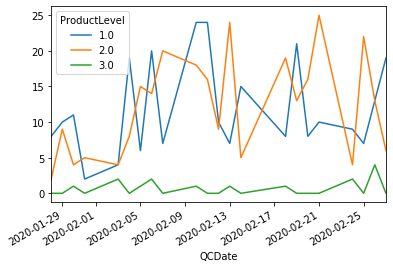

In [75]:
df_daily_unstacked_1.plot()

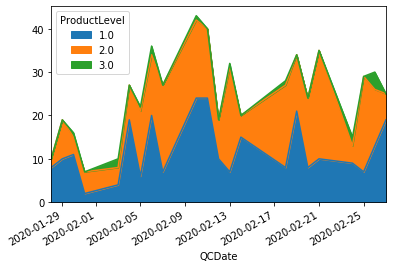

In [76]:
df_daily_unstacked_1.plot(kind='area')

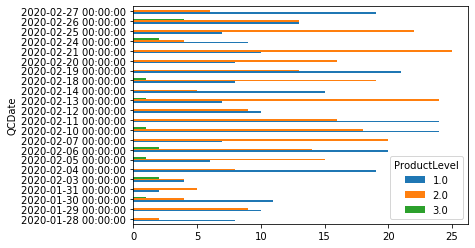

In [77]:
df_daily_unstacked_1.plot(kind='barh')

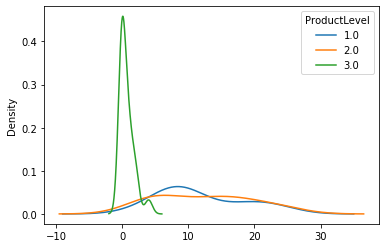

In [78]:
df_daily_unstacked_1.plot(kind='kde')

---
# WorkBook

timestamp for filename

In [79]:
ts_str = str(test_date)[:10] #str(pd.Timestamp.now())[:10]

create filename var

In [80]:
filename_str = str("QCMetrics_" + str(ts_str) + ".xlsx")

In [81]:
# CREATE NEW WORKBOOK
wb = Workbook()
wb.save(filename_str)

In [82]:
# LOAD EXISTING WORKBOOK
wb = load_workbook(filename_str)

In [83]:
# ADD SHEETS TO WORKBOOK
# DESGIGNATE SHEET NAME AND POSITION
sheet1 = wb.create_sheet('Table', 0)
sheet2 = wb.create_sheet('Graphs',1)

In [84]:
# ACTIVATE WORKSHEET TO WRITE DATAFRAME
active = wb['Table']

# WRTIE DATAFRAME TO ACTIVE WORKSHEET
for x in dataframe_to_rows(df_daily_unstacked_1): # {
    active.append(x)
# }

# SAVE 
wb.save(filename_str)

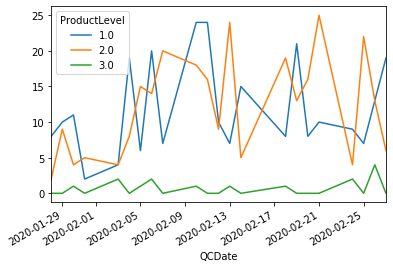

In [85]:
# CREATE LINE PLOT VARIABLE
plot = df_daily_unstacked_1.plot()

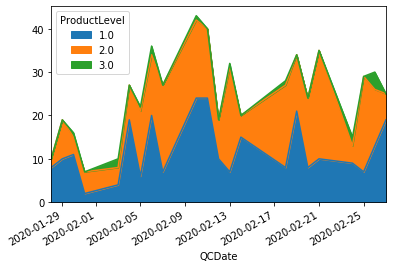

In [86]:
# CREATE AREA PLOT VARIABLE
area_plot = df_daily_unstacked_1.plot(kind='area')

In [87]:
# CREATE BAR PLOT VARIABLE
# [2020-02-27]\\bar_plot = df_daily_unstacked_1.plot(kind='barh')

In [88]:
# CREATE kde PLOT VARIABLE
# [2020-02-27]\\kde_plot = df_daily_unstacked_1.plot(kind='kde')

### create `figure` vairables

In [89]:
# MATPLOTLIB figure for "line_plot"
fig = plot.get_figure()
# MATPLOTLIB figure for "area_plot"
area_fig = area_plot.get_figure()
"""
# MATPLOTLIB figure for "bar_plot"
bar_fig = bar_plot.get_figure()
# MATPLOTLIB figure for "kde_plot"
kde_fig = kde_plot.get_figure()
"""

'\n# MATPLOTLIB figure for "bar_plot"\nbar_fig = bar_plot.get_figure()\n# MATPLOTLIB figure for "kde_plot"\nkde_fig = kde_plot.get_figure()\n'

In [90]:
# SAVE LINE PLOT
fig.savefig(ts_str + "_line_plot.png")
# SAVE AREA PLOT
area_fig.savefig(ts_str + "_area_plot.png")
"""
# SAVE BAR PLOT
bar_fig.savefig(ts_str + "_bar_plot.png")
# SAVE KDE PLOT
kde_fig.savefig(ts_str + "_kde_plot.png")
"""

'\n# SAVE BAR PLOT\nbar_fig.savefig(ts_str + "_bar_plot.png")\n# SAVE KDE PLOT\nkde_fig.savefig(ts_str + "_kde_plot.png")\n'

In [91]:
# ACTIVATE WORKSHEET
active = wb['Graphs']

In [92]:
# Insert Plot into worksheet
# Select active sheet and cell reference
img_line = Image(ts_str + "_line_plot.png")
active.add_image(img_line, 'A1')

In [93]:
# Insert Plot into worksheet
# Select active sheet and cell reference
img_area = Image(ts_str + "_area_plot.png")
active.add_image(img_area, "H1")

In [94]:
# SAVE WORKBOOK
wb.save(filename_str)

In [95]:
# WRITE DATAFRAME TO ACTIVE WORKSHEET

---
# Create *empty* `DataFrame` to hold **FINAL** `Metrics` 
*(and lists to hold columns*)

In [96]:
QCMetrics_Month = pd.DataFrame(data=None,
                              index=pd.date_range(start=one_month_ago,
                                                 end=test_date,
                                                 freq='D',
                                                 name='QCDate'),
                              columns=pd.CategoricalIndex(['L1', 'L2', 'L3'], name='Levels')
                              )

In [97]:
QCMetrics_Month.index

DatetimeIndex(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27'],
              dtype='datetime64[ns]', name='QCDate', freq='D')

In [98]:
QCMetrics_Month.columns

CategoricalIndex(['L1', 'L2', 'L3'], categories=['L1', 'L2', 'L3'], ordered=False, name='Levels', dtype='category')

In [99]:
QCMetrics_Month

Levels,L1,L2,L3
QCDate,,,
2020-01-28,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN


In [100]:
df_daily_levels.head(5)

Count
QCDate     ProductLevel       
2020-01-28 1.0               8
           2.0               2
2020-01-29 1.0              10
           2.0               9
2020-01-30 1.0              11

In [101]:
result = df_daily_levels.join(QCMetrics_Month, 
                              on = ['QCDate'],
                              how='inner', 
                              sort=True)

In [102]:
result

Count   L1   L2   L3
QCDate     ProductLevel                      
2020-01-28 1.0               8  NaN  NaN  NaN
           2.0               2  NaN  NaN  NaN
2020-01-29 1.0              10  NaN  NaN  NaN
           2.0               9  NaN  NaN  NaN
2020-01-30 1.0              11  NaN  NaN  NaN
           2.0               4  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-01-31 1.0               2  NaN  NaN  NaN
           2.0               5  NaN  NaN  NaN
2020-02-03 1.0               4  NaN  NaN  NaN
           2.0               4  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-04 1.0              19  NaN  NaN  NaN
           2.0               8  NaN  NaN  NaN
2020-02-05 1.0               6  NaN  NaN  NaN
           2.0              15  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-06 1.0              20  NaN  NaN  NaN
           2.0              14  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-07 1.0               7  NaN  NaN  NaN
           2.0              20  NaN  NaN  NaN
2020-02-10 1.0              24  NaN  NaN  NaN
           2.0              18  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-11 1.0              24  NaN  NaN  NaN
           2.0              16  NaN  NaN  NaN
2020-02-12 1.0              10  NaN  NaN  NaN
           2.0               9  NaN  NaN  NaN
2020-02-13 1.0               7  NaN  NaN  NaN
           2.0              24  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-14 1.0              15  NaN  NaN  NaN
           2.0               5  NaN  NaN  NaN
2020-02-18 1.0               8  NaN  NaN  NaN
           2.0              19  NaN  NaN  NaN
           3.0               1  NaN  NaN  NaN
2020-02-19 1.0              21  NaN  NaN  NaN
           2.0              13  NaN  NaN  NaN
2020-02-20 1.0               8  NaN  NaN  NaN
           2.0              16  NaN  NaN  NaN
2020-02-21 1.0              10  NaN  NaN  NaN
           2.0              25  NaN  NaN  NaN
2020-02-24 1.0               9  NaN  NaN  NaN
           2.0               4  NaN  NaN  NaN
           3.0               2  NaN  NaN  NaN
2020-02-25 1.0               7  NaN  NaN  NaN
           2.0              22  NaN  NaN  NaN
2020-02-26 1.0              13  NaN  NaN  NaN
           2.0              13  NaN  NaN  NaN
           3.0               4  NaN  NaN  NaN
2020-02-27 1.0              19  NaN  NaN  NaN
           2.0               6  NaN  NaN  NaN

In [103]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 53 entries, (2020-01-28 00:00:00, 1.0) to (2020-02-27 00:00:00, 2.0)
Data columns (total 4 columns):
Count    53 non-null int64
L1       0 non-null object
L2       0 non-null object
L3       0 non-null object
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


---
# messups

---

# `ExcelWorkBook` functions

In [104]:
# str for filename
filename_str = str(test_date) #str(pd.Timestamp.now())[:10]
print(filename_str)

2020-02-27 00:00:00


In [105]:
# Create new workbook
wb = Workbook()

In [106]:
# Add sheets to workbook
# Designate sheet name and position
sheet1 = wb.create_sheet('sheet1',0)
sheet2 = wb.create_sheet('sheet2',1)
sheet3 = wb.create_sheet('sheet3',2)

In [107]:
# Activate worksheet to write dataframe
active = wb['sheet1']

# Write dataframe to active worksheet
for x in dataframe_to_rows(df_QCMetrics):
    active.append(x)

# Save workbook to write
wb.save(filepath)

KeyError: <class 'pandas._libs.tslibs.nattype.NaTType'>

In [ ]:
wb.save("QCMetrics-"  +  filename_str + ".xlsx")